# 线性回归

在机器学习中一种用已有数据预言未知情况的方法是**线性回归**。

用一个线性函数来拟合数据。
$
 h_\theta (x)=\theta_1 x+\theta_2 b
$

通过算法来调整系数$\theta_1$和$\theta_2$的值，使这个函数的图像**尽可能的和数据相符合**。

徦设有如下数据：


In [14]:
x = [1,1.2,1.8,1.7,2.5,2.2,1.5]
y = [1.5,2,2.4,2.7,3.3,3,2.35]

<IPython.core.display.Javascript object>


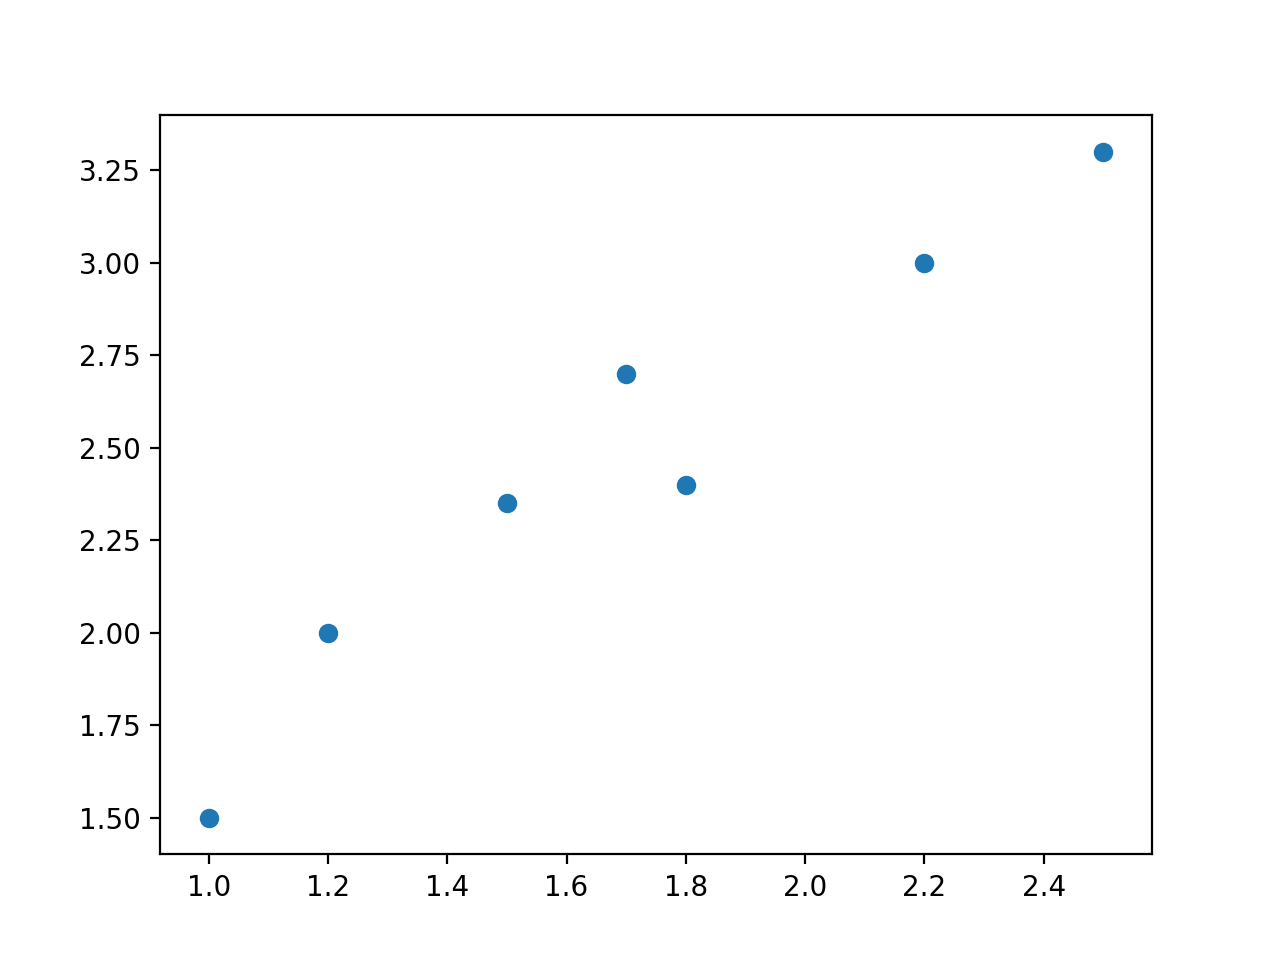

In [15]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.scatter(x,y)
plt.show()

# 代阶函数

怎样的直线才能**尽可能的**拟合这些数据呢？

一种做发是对于给定的$\theta_1$和$\theta_2$，计算数据点和拟合直线之间的误差，误差要小的$h_\theta$当然越好。

比如，对于上面的数据集，$x_0=1$, $y_0=1.5$ , $h_\theta(x_0)$ - y_0 就是该函数的预测值。那么对于数据集中的所以数据和拟合直线之间的误差总和为：
$$
(h_\theta(x_0)-y_0) + (h_\theta(x_1)-y_1) + (h_\theta(x_2)-y_2) + ...
$$

由于正负误差相互抵消，所以上面的总误差不能真实的反映$h_\theta$的优劣。为了去掉这种抵消，可把各误差项取平方。为什么不取绝对值呢？估计是不好求最小误差。

$$
  (h_\theta(x_0)-y_0)^2 + (h_\theta(x_1)-y_1)^2 + (h_\theta(x_2)-y_2)^2 + ...
$$

这是一个关于$\theta_0$和$\theta_1$的二元函数，用符号J来表示的话：
$$
J(\theta_0,\theta_1) = \sum_0^m(h_\theta(x_i)-y_i)^2
$$

这里的m就是被拟合的数据集中的数据个数，$J(\theta_0,\theta_1)$就叫代阶函数（Cost Function）。

如果能找到一对$\theta$使函数$J(\theta_0,\theta_1)$取值最小，那么就说明用这对$\theta$构建的$h_\theta$和数据集之间有最小的误差。

# 求代价函数最小值

重要的不是低阶函数的最小值，而是取的最小值的那对$\theta$

## 梯度下降法

先看一维的情况，如何求某$J(\theta)$的最小值。


In [1]:
print("这里有个图")

这里有个图


如图，$J(\theta)$在$\theta '$处取得最小值，我们先随机选一个$\theta_0$, 它在$\theta'$的右边，因此我们减去上一点正偏移量就可以更靠近$\theta'$一点。重复这个过程，就可让$\theta_i$越来越靠近$\theta'$

$$
\theta_i = \theta_{i-1} - \delta_r
$$

如果$\theta_i$在$\theta'$的左边，那么就应该加上一个正偏移量才能让$\theta_i$向$\theta'$靠拢。

$$
\theta_i = \theta_{i-1} + \delta_l
$$




用伪代码了表示这个靠近的过程：

```

while ( isCloseEnough( θ )) {
   if( θ < θ' ) {
       θ = θ + δl
   }else {
       θ = θ - δr
   }

}

```

问题是本来就是要找出$\theta'$来，而这里却需要根据$\theta'$来确定该增大还是减小$\theta$的值。如果能用一个表达式来更新$theta$的值就好了。

如果$\theta$在$\theta'$的左边（徦设$J(\theta)$单调），那么$J'(\theta)<0$,如果$\theta$在$\theta'$的右边，那么$J'(\theta)>0$,
因此，更新$\theta$的方法可改为

$$
\theta_i = \theta_{i-1} - J'(\theta)
$$

